# Q09
    15/Jun/2022

Fit a logistic regression model using the diabetes dataset (https://github.com/Accelerate-AI/Classification-Models/blob/main/data/diabetes.csv) and provide the confusion matrix, draw the ROC AUC chart.

The diabetes dataset indicates whether the outcome of the person will be diabetic or not(1 for diabetic, else 0 for not), given features such as BMI, insulin, glucose level etc.

Explain on your confusion matrix outcomes.

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from statsmodels.api import Logit, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scikitplot as skplt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# check for multi-collinearity before considering variables for modelling
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif.sort_values('VIF', ascending=False, inplace=True)
    return(vif)

In [4]:
# 1. Remove BMI, since it has highest vif value(18.408884)
# 2. Remove Glucose, since it has highest vif value of 13.573749
# 3. Remove Age, since it has highest vif value of 10.896809
x_var = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
y_var = ['Outcome']

X = df[x_var]
y = df[y_var]

calculate_vif(X)

,variables,VIF
1,BloodPressure,5.288085
2,SkinThickness,3.447548
4,DiabetesPedigreeFunction,2.897474
0,Pregnancies,2.306086
3,Insulin,1.857940


In [5]:
def fit_logistic_reg_with_intercept(X, Y):
    X = sm.add_constant(X) # adding a constant
    log_reg_model = sm.Logit(y, X).fit()
    return log_reg_model

In [6]:
# 1. Remove SkinThickness, since its coefficient is not significant
# 2. Remove BloodPressure, since its coefficient is not significant
x_var = ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction']
y_var = ['Outcome']

X = df[x_var]
y = df[y_var]
log_model = fit_logistic_reg_with_intercept(X, y)
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.598586
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 Jun 2022   Pseudo R-squ.:                 0.07454
Time:                        22:03:09   Log-Likelihood:                -459.71
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.772e-16
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.9456      0.189    -10.306      0.000      -2.316

In [7]:
y_pred = log_model.predict(sm.add_constant(X))
y_pred_class = (y_pred > 0.5).astype(int)

## a. Confusion Matrix

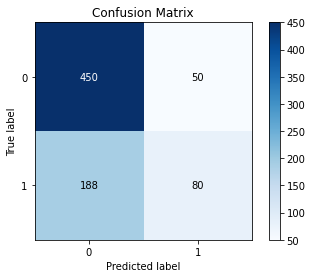

In [8]:
skplt.metrics.plot_confusion_matrix(y, y_pred_class)

plt.show()

## ROC curve

In [9]:
y_pred_both_class = np.stack((y_pred, 1 - y_pred), axis=1)
print(y_pred_both_class.shape)

(768, 2)


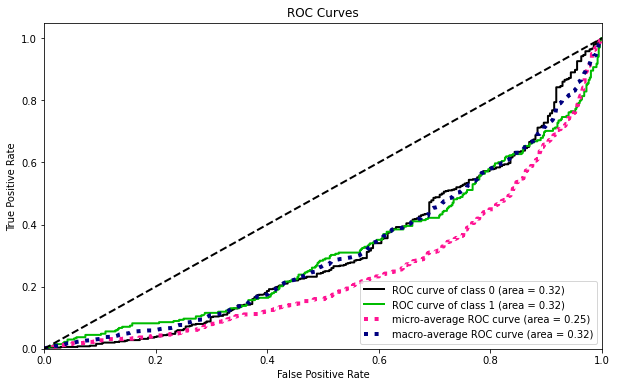

In [10]:
skplt.metrics.plot_roc(y, y_pred_both_class, figsize=(10, 6))

plt.show()

## Interpretation:
    - After looking at the ROC curve we observe that the random model is better than the logistic regression model. 
    - It seems we need to more work on logistic regression model, or we need better features for the model. 
    - The pseudo R square of the model is also very low.
    - If we would just go by confusion matrix, then we would have missed this. Hence one should always look at ROC curve.